In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("./datasets/StudentsPerformance_modified.csv")

In [3]:
print("Dataset Overview:\n")
df.head()

Dataset Overview:



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
print("\nDataset Information:\n")
df.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [5]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [6]:
print("\nColumn Data Types:")
df.dtypes


Column Data Types:


gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [7]:
df = df.copy()
df["math score"] = df["math score"].replace("?", np.nan, regex=False)
df["math score"] = pd.to_numeric(df["math score"], errors="coerce")

In [8]:
def handle_missing_values(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            if df[column].dtype in ["int64", "float64"]:
                df[column] = df[column].fillna(df[column].median())
            else:
                df[column] = df[column].fillna(df[column].mode()[0])


handle_missing_values(df)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [9]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
import numpy as np

numeric_df = df.select_dtypes(include=["float64", "int64"])

mean_df = numeric_df.mean()
print(f"\nMean:\n{np.round(mean_df, 2)}")

std_df = numeric_df.std()
print(f"\nStandard Deviation:\n{np.round(std_df, 2)}")

z_scores = (numeric_df - mean_df) / std_df
print(f"\nZ-scores:\n{np.round(z_scores, 2)}")


Mean:
math score       66.31
reading score    68.02
writing score    69.48
dtype: float64

Standard Deviation:
math score       17.88
reading score    16.55
writing score    29.43
dtype: float64

Z-scores:
     math score  reading score  writing score
0          0.32           0.24           0.15
1          0.15           1.33           0.63
2          1.32           1.63           0.80
3         -1.08          -0.67          -0.87
4          0.54           0.60           0.19
..          ...            ...            ...
995        1.21           1.87           0.87
996       -0.24          -0.79          -0.49
997       -0.41           0.18          -0.15
998        0.09           0.60           0.26
999        0.60           1.09           0.56

[1000 rows x 3 columns]


In [11]:
def detect_outliers_iqr(data):
    numeric_data = pd.to_numeric(data, errors="coerce").dropna()

    q1 = np.percentile(numeric_data, 25)
    q3 = np.percentile(numeric_data, 75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    return numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

In [12]:
from sklearn.preprocessing import StandardScaler


def detect_outliers_standard_scaler(data):
    # Convert data to numeric and drop NaN values
    numeric_data = pd.to_numeric(data, errors="coerce").dropna().values
    numeric_data = numeric_data.reshape(-1, 1)  # Reshape for scaling

    # Apply standard scaling
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)

    # Z-score threshold for outliers
    z_threshold = 3

    # Create boolean mask for outliers
    outlier_mask = (scaled_data.flatten() < -z_threshold) | (
        scaled_data.flatten() > z_threshold
    )

    # Convert outliers to native Python floats
    return numeric_data[outlier_mask].astype(float).tolist()

In [13]:
from sklearn.preprocessing import MinMaxScaler


def detect_outliers_minmax_scaler(data):
    # Convert data to numeric and drop NaN values
    numeric_data = pd.to_numeric(data, errors="coerce").dropna().values
    numeric_data = numeric_data.reshape(-1, 1)  # Reshape for scaling

    # Apply min-max scaling
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(numeric_data)

    # Thresholds for outliers
    lower_threshold = -0.5
    upper_threshold = 1.5

    # Create boolean mask for outliers
    outlier_mask = (scaled_data.flatten() < lower_threshold) | (
        scaled_data.flatten() > upper_threshold
    )

    # Convert outliers to native Python floats
    return numeric_data[outlier_mask].astype(float).tolist()

In [14]:
outliers_iqr, outlies_std, outliers_minmax = None, None, None


# Handle Outliers Function
def handle_outliers(df):
    for column in df.select_dtypes(include=["int64", "float64"]):
        print(f"\nHandling Outliers for {column}:")

        # Detecting outliers
        outliers_std = detect_outliers_standard_scaler(df[column])
        outliers_minmax = detect_outliers_minmax_scaler(df[column])
        outliers_iqr = detect_outliers_iqr(df[column])

        # Displaying outliers
        if len(outliers_std) > 0:
            print(f"\tOutliers (std): {list(outliers_std)}")
        if len(outliers_minmax) > 0:
            print(f"\tOutliers (minmax): {list(outliers_minmax)}")
        if len(outliers_iqr) > 0:
            print(f"\tOutliers (iqr): {list(outliers_iqr)}")

            # Handling outliers by replacing them with the median
            median_value = df[column].median()
            df[column] = np.where(
                df[column].isin(outliers_iqr), median_value, df[column]
            )

    return df


df = handle_outliers(df)


Handling Outliers for math score:
	Outliers (std): [[0.0], [123.0], [-89.0], [334.0], [8.0]]
	Outliers (iqr): [0.0, 27.0, 22.0, 28.0, 24.0, 27.0, 113.0, 123.0, -89.0, 26.0, 334.0, 19.0, 23.0, 8.0]

Handling Outliers for reading score:
	Outliers (std): [[12.0], [12.0], [13.0], [14.0], [9.0], [8.0], [7.0], [6.0], [4.0], [3.0], [5.0], [6.0], [11.0], [11.0], [12.0], [12.0], [17.0]]
	Outliers (iqr): [22.0, 22.0, 12.0, 12.0, 13.0, 14.0, 9.0, 8.0, 7.0, 6.0, 4.0, 3.0, 5.0, 6.0, 22.0, 11.0, 11.0, 12.0, 12.0, 17.0, 26.0, 23.0, 24.0, 24.0]

Handling Outliers for writing score:
	Outliers (std): [[455.0], [567.0], [554.0]]
	Outliers (iqr): [10.0, 22.0, 19.0, 112.0, 114.0, 455.0, 567.0, 15.0, 554.0, 23.0]


In [15]:
def transform_data(df):
    df = df.copy()
    df["math score"] = pd.to_numeric(df["math score"], errors="coerce")
    df["math score"].fillna(0, inplace=True)

    for column in ["math score", "reading score", "writing score"]:
        df[column] = df[column].astype(int)
        df[column] = df[column].abs()

In [16]:
from sklearn.preprocessing import RobustScaler

numeric_data = df.select_dtypes(["int64", "float64"])

scaler1 = RobustScaler()
scaler2 = MinMaxScaler()

robust_scaled_data = scaler1.fit_transform(numeric_data)
normalized_data = scaler2.fit_transform(robust_scaled_data)

normalized_df = pd.DataFrame(normalized_data, columns=numeric_data.columns)

In [17]:
round(normalized_df, 2)

,math score,reading score,writing score
0,0.61,0.61,0.64
1,0.56,0.86,0.84
2,0.86,0.93,0.90
3,0.25,0.40,0.23
4,0.66,0.69,0.66
...,...,...,...
995,0.83,0.99,0.93
996,0.46,0.37,0.38
997,0.42,0.60,0.52
998,0.55,0.69,0.68


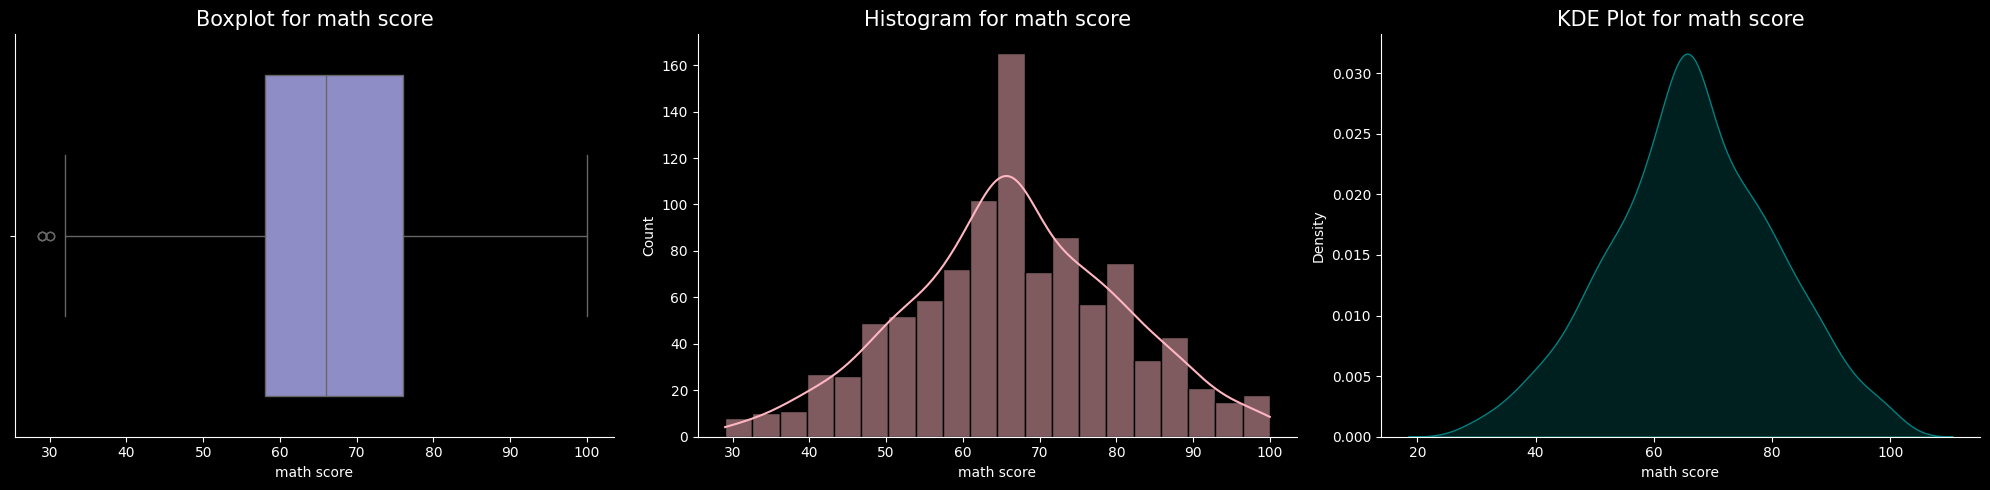

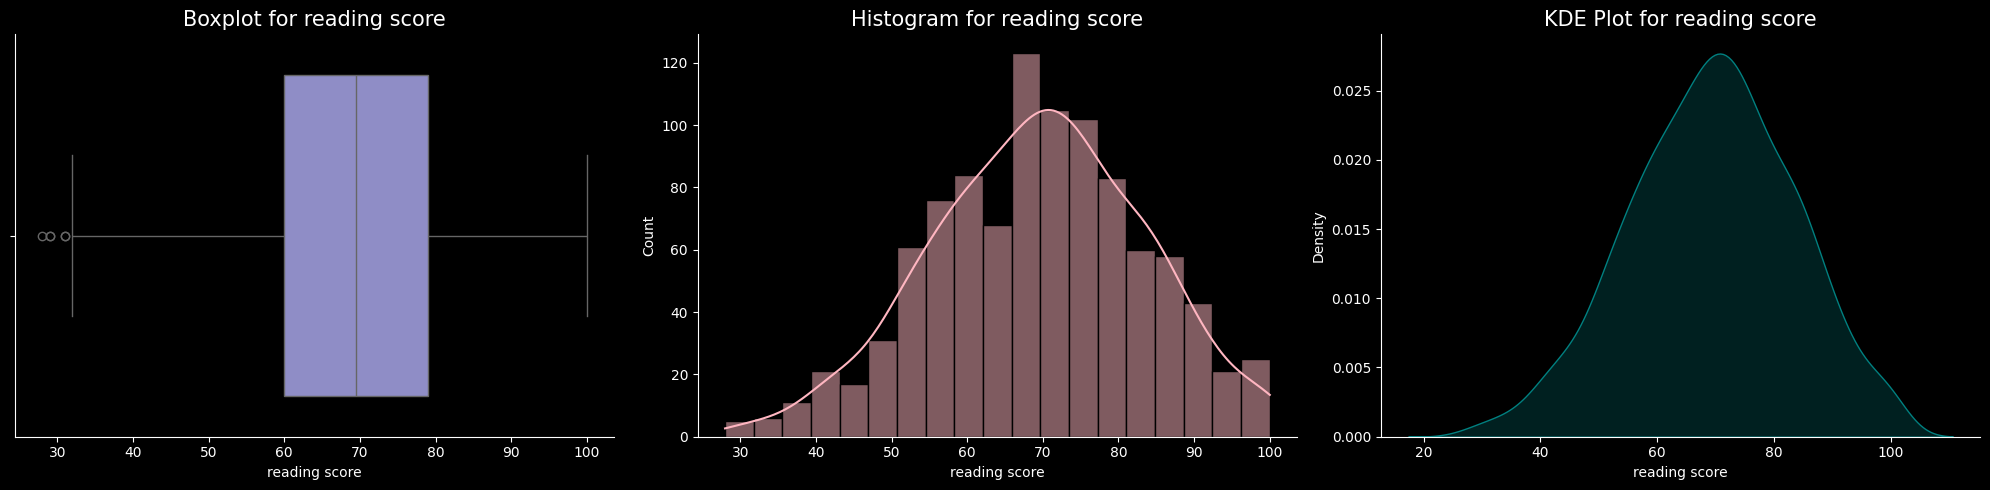

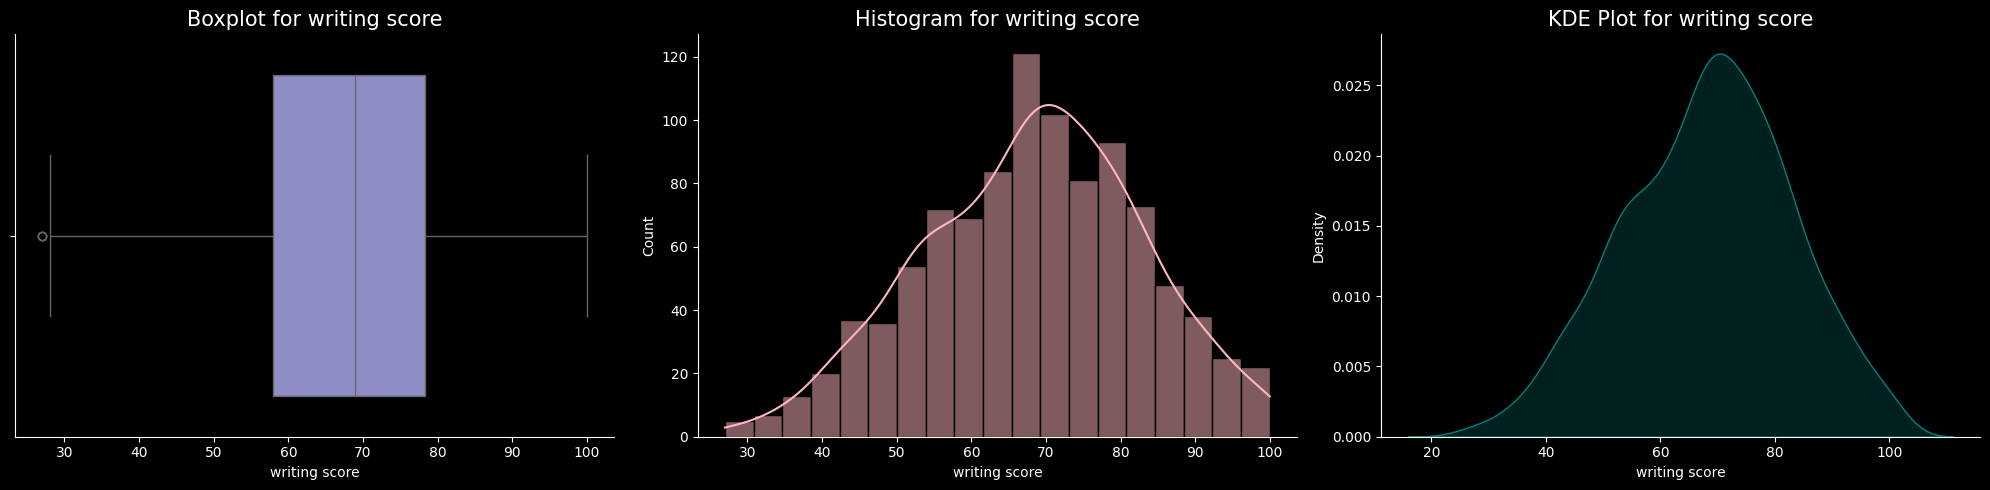

In [18]:
def visualize_data(df):
    numeric_cols = ["math score", "reading score", "writing score"]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

    for column in numeric_cols:
        fig, axes = plt.subplots(1, 3, figsize=(20, 5))

        column_data = df[column]

        # Boxplot
        sns.boxplot(x=column_data, color="#8684CF", orient="h", ax=axes[0])
        axes[0].set_title(f"Boxplot for {column}", fontsize=15)

        # Histogram
        sns.histplot(
            column_data, kde=True, color="lightpink", edgecolor="black", ax=axes[1]
        )
        axes[1].set_title(f"Histogram for {column}", fontsize=15)
        axes[1].grid(False)

        # KDE Plot
        sns.kdeplot(column_data, fill=True, color="teal", ax=axes[2])
        axes[2].set_title(f"KDE Plot for {column}", fontsize=15)
        axes[2].grid(False)

        plt.tight_layout()
        sns.despine()


visualize_data(df)

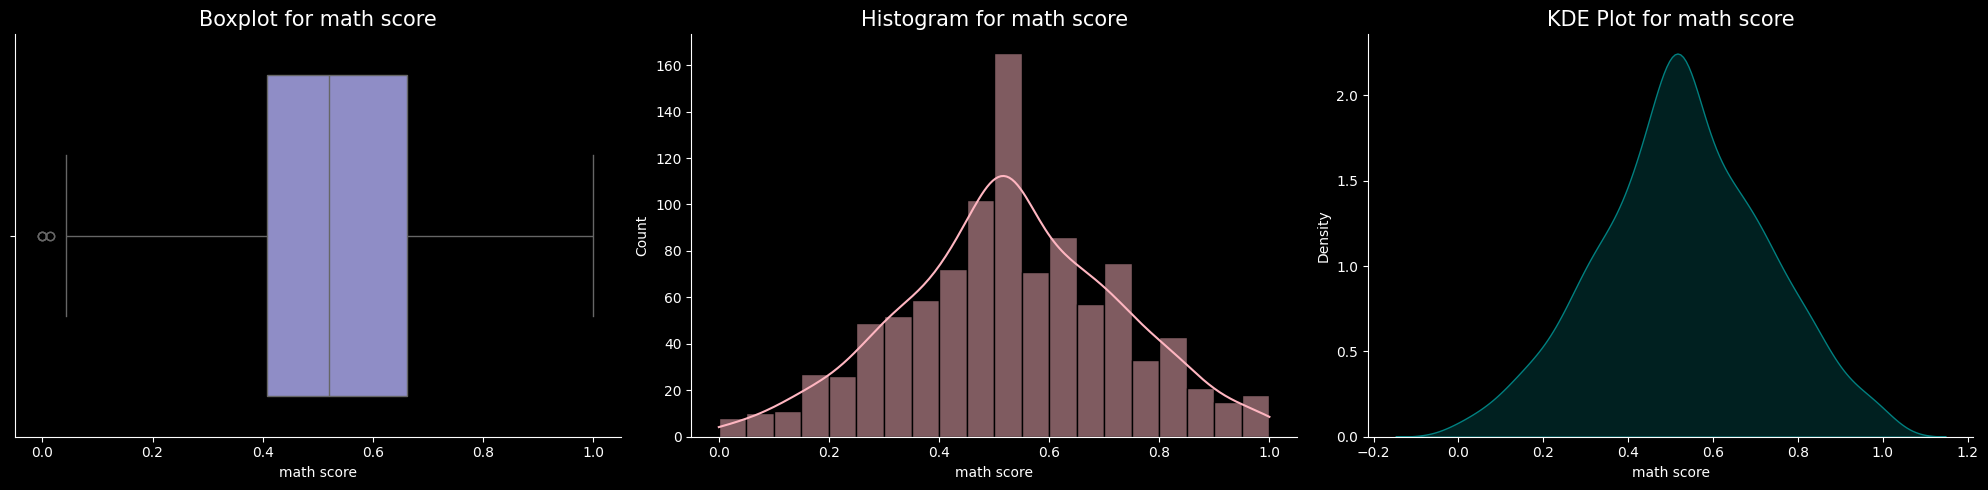

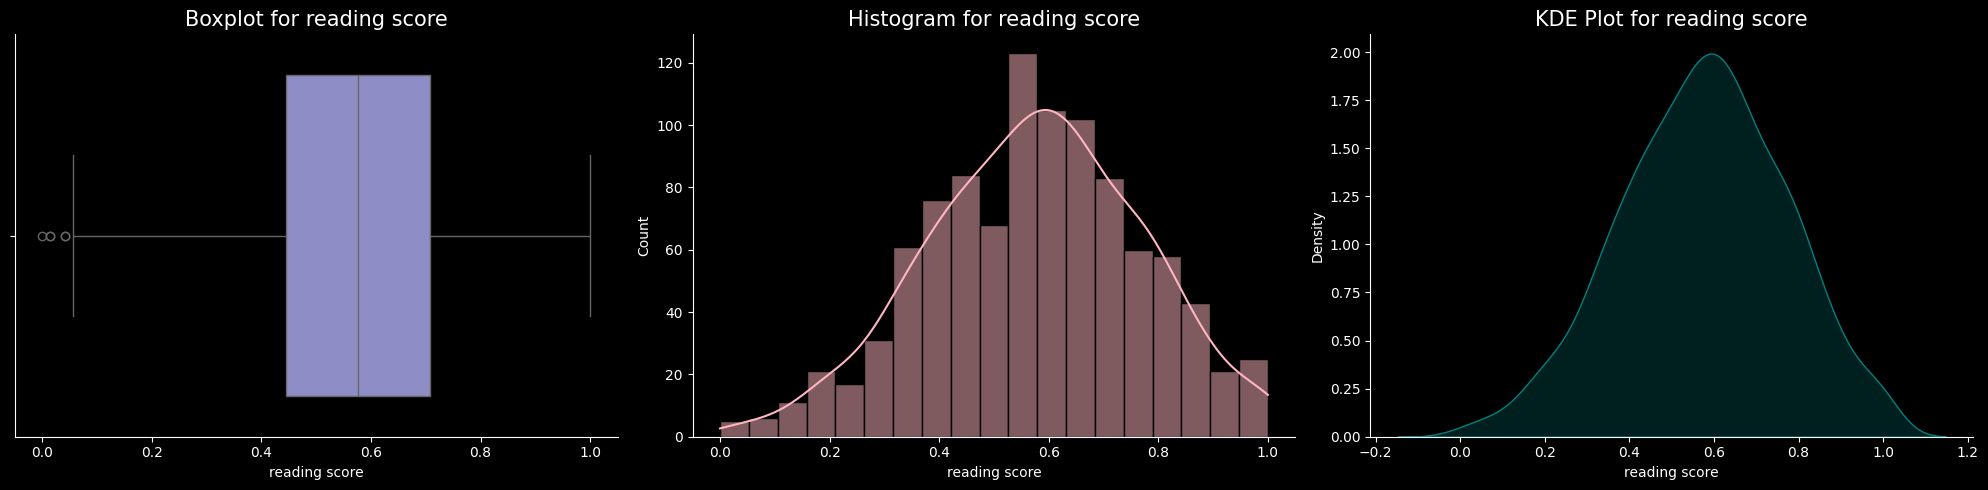

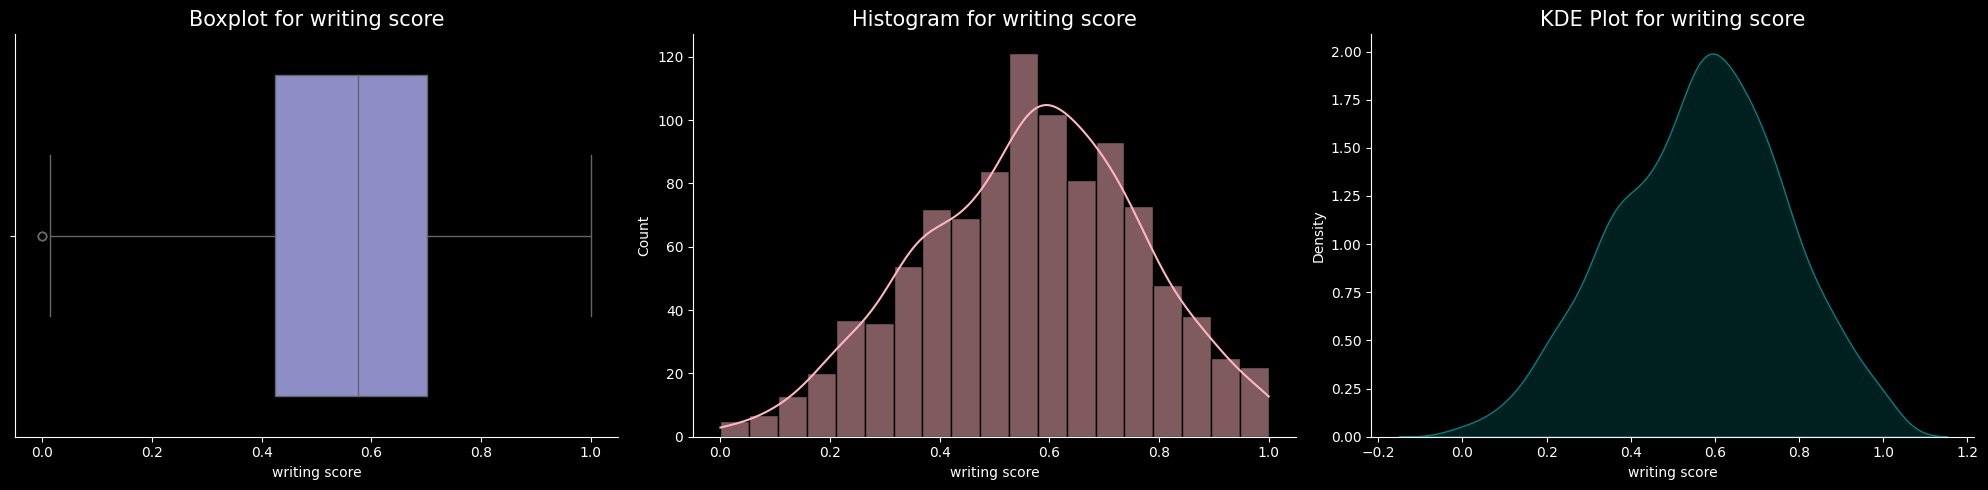

In [19]:
visualize_data(normalized_df)

Text(0.5, 1.0, 'Correlation Heatmap of Scores')

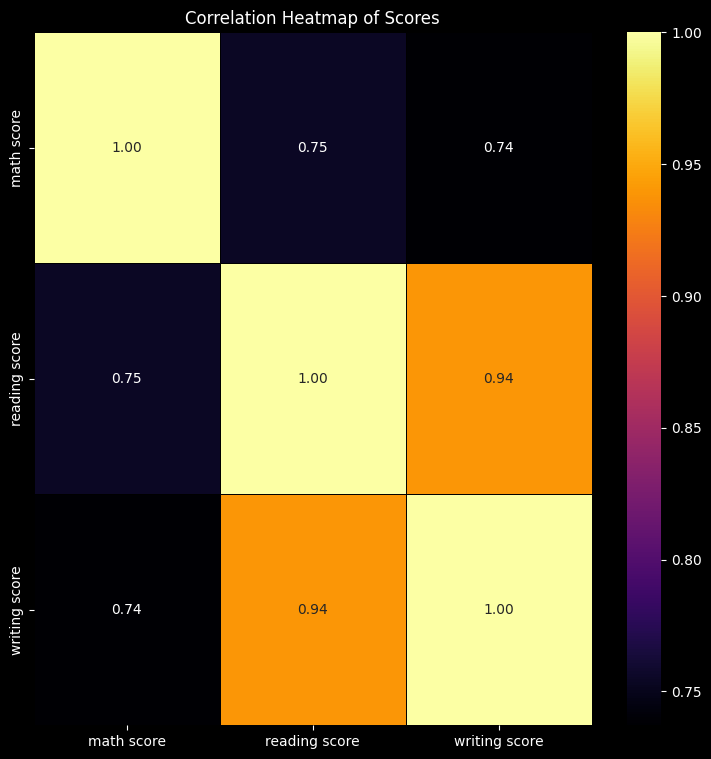

In [20]:
# Heat map
plt.figure(figsize=(9, 9))
correlation = df[["math score", "reading score", "writing score"]].corr()

sns.heatmap(
    correlation,
    annot=True,
    cmap="inferno",
    fmt=".2f",
    linewidths=0.5,
    linecolor="black",
)

plt.title("Correlation Heatmap of Scores")

Text(0.5, 1.0, 'Correlation Heatmap of Scores')

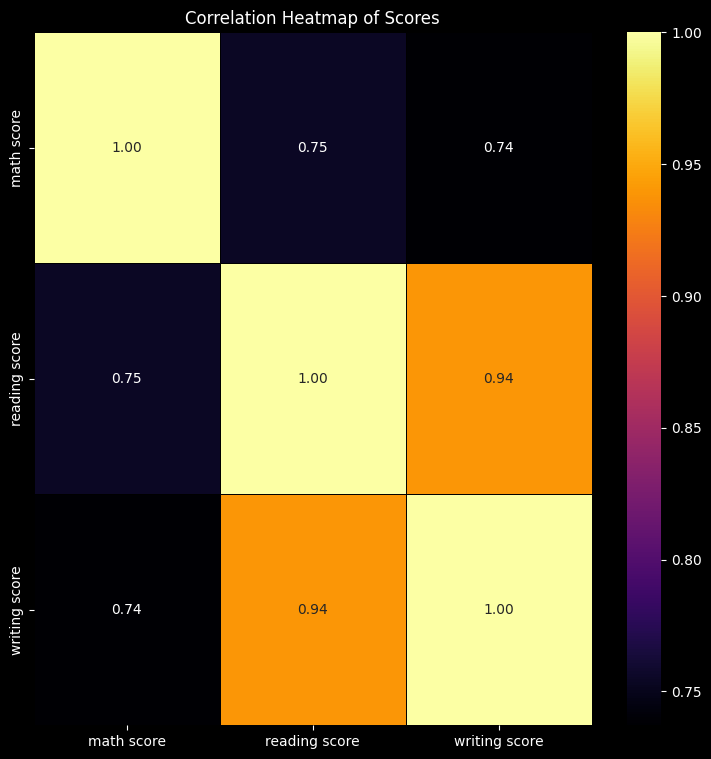

In [21]:
# Heat map
plt.figure(figsize=(9, 9))
correlation = normalized_df[["math score", "reading score", "writing score"]].corr()

sns.heatmap(
    correlation,
    annot=True,
    cmap="inferno",
    fmt=".2f",
    linewidths=0.5,
    linecolor="black",
)

plt.title("Correlation Heatmap of Scores")

Text(0.5, 1.02, 'Scatter and KDE Plots of Scores')

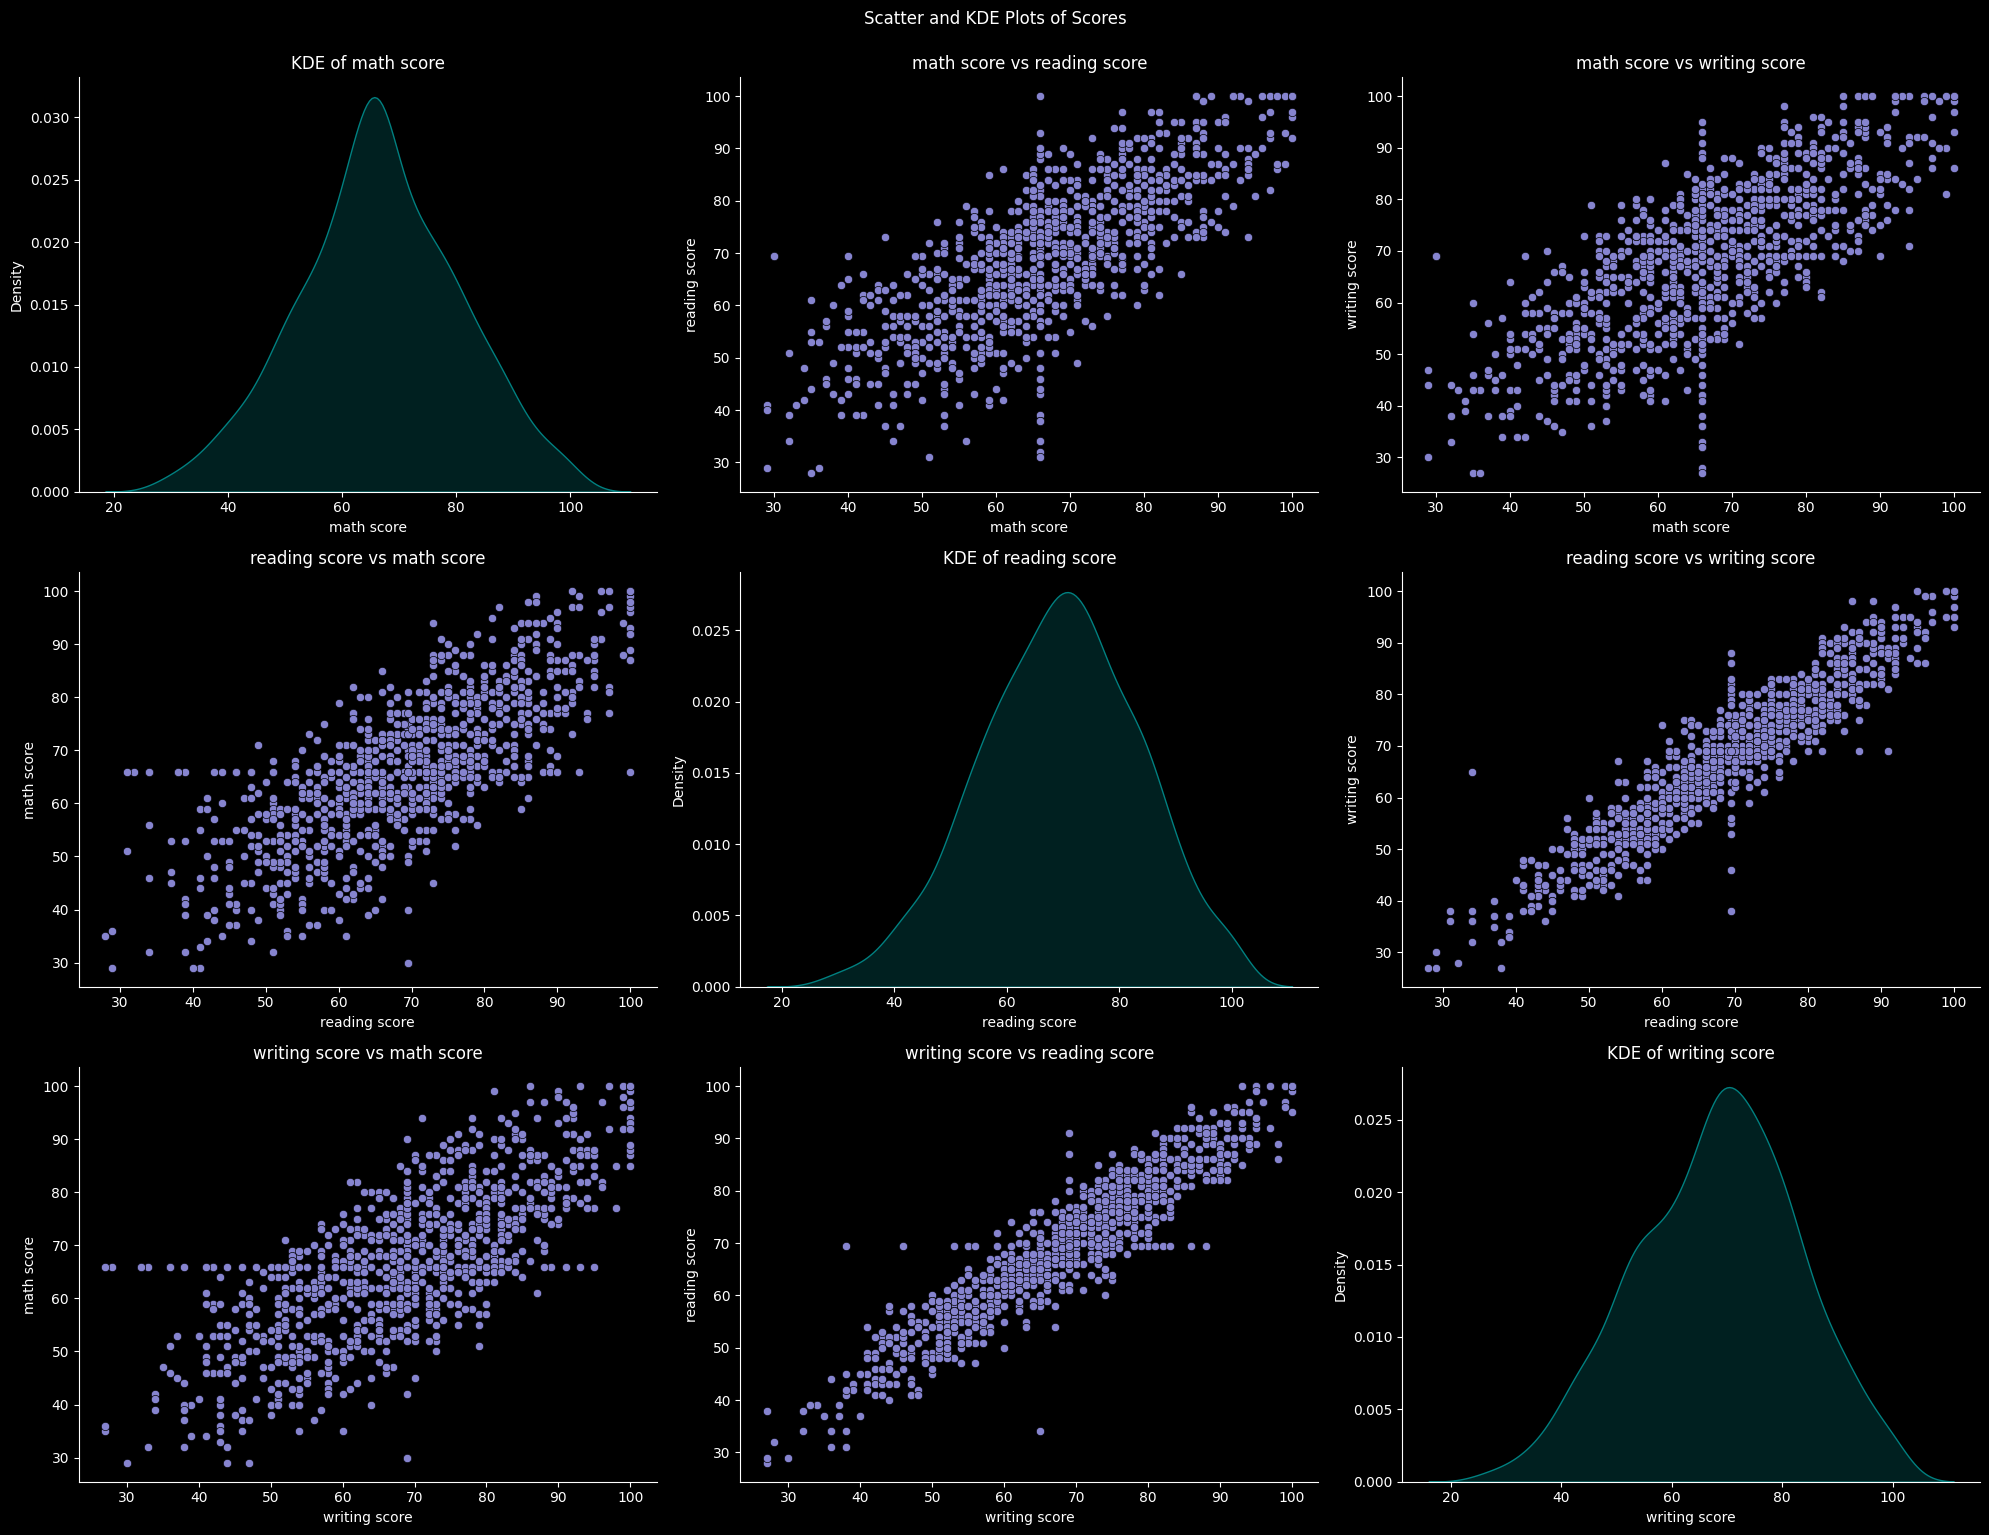

In [22]:
# Pair plot
columns = ["math score", "reading score", "writing score"]

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i == j:
            # KDE plot for the diagonal
            sns.kdeplot(data=df, x=col1, fill=True, color="teal", ax=axes[i, j])
            axes[i, j].set_title(f"KDE of {col1}")

        else:
            # Scatter plot for the off-diagonal
            sns.scatterplot(
                data=df,
                x=col1,
                y=col2,
                color="#8684CF",
                edgecolor="black",
                ax=axes[i, j],
            )
            axes[i, j].set_title(f"{col1} vs {col2}")

        axes[i, j].grid(False)

# Adjust layout
plt.tight_layout()
sns.despine()
plt.suptitle("Scatter and KDE Plots of Scores", y=1.02)

Text(0.5, 1.02, 'Scatter and KDE Plots of Scores')

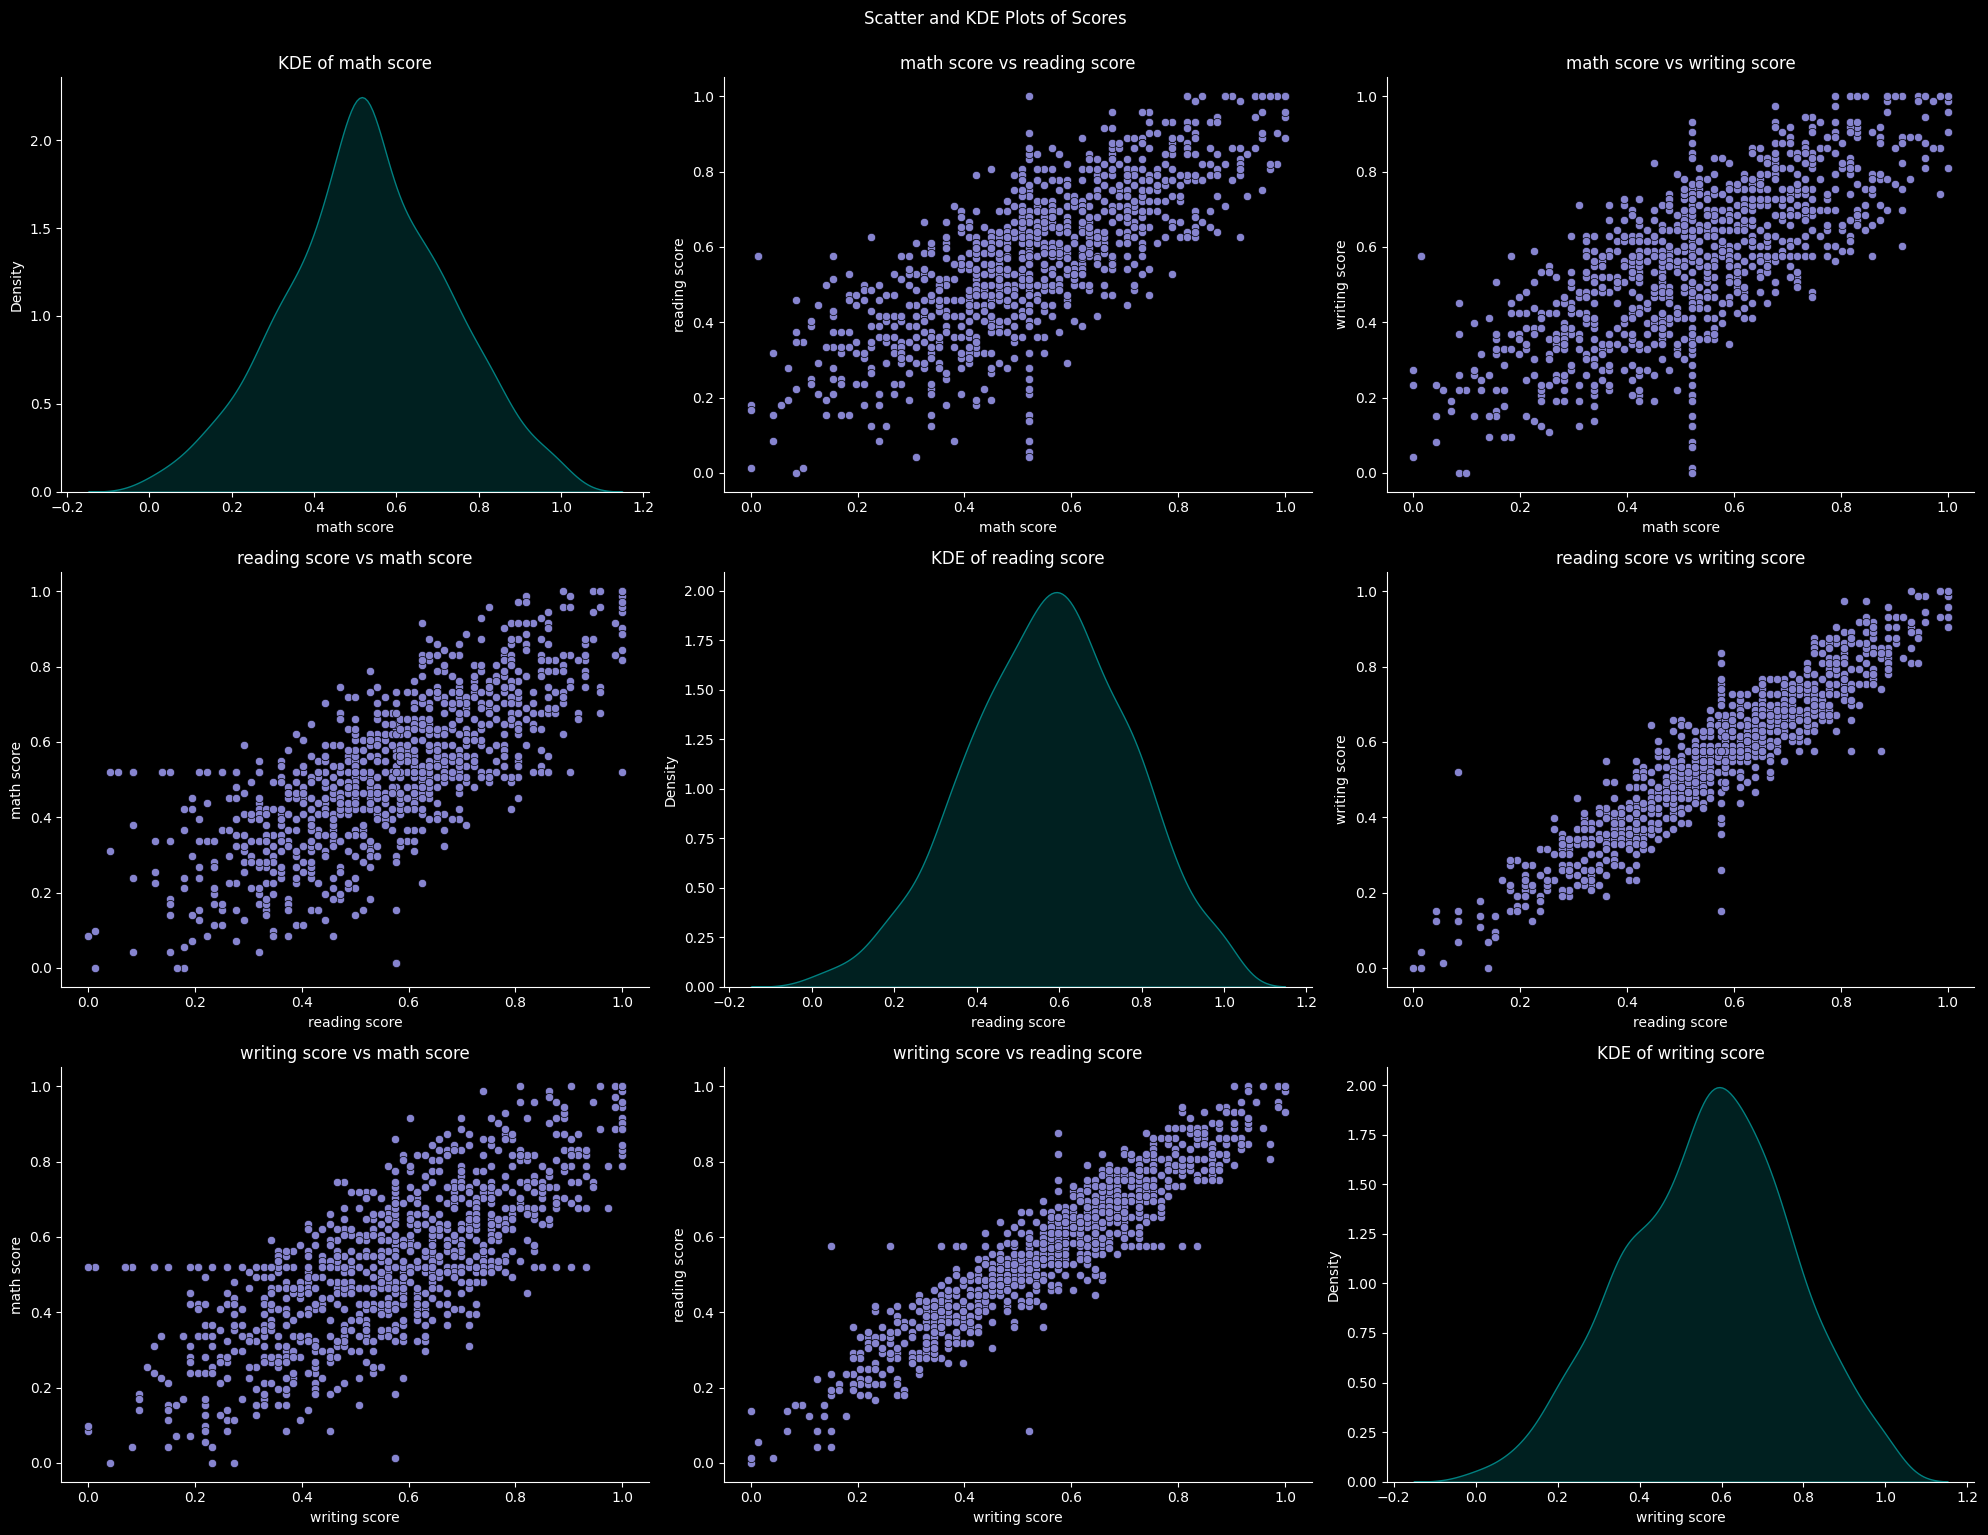

In [23]:
# Pair plot
columns = ["math score", "reading score", "writing score"]

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i == j:
            # KDE plot for the diagonal
            sns.kdeplot(
                data=normalized_df, x=col1, fill=True, color="teal", ax=axes[i, j]
            )
            axes[i, j].set_title(f"KDE of {col1}")

        else:
            # Scatter plot for the off-diagonal
            sns.scatterplot(
                data=normalized_df,
                x=col1,
                y=col2,
                color="#8684CF",
                edgecolor="black",
                ax=axes[i, j],
            )
            axes[i, j].set_title(f"{col1} vs {col2}")

        axes[i, j].grid(False)

# Adjust layout
plt.tight_layout()
sns.despine()
plt.suptitle("Scatter and KDE Plots of Scores", y=1.02)

In [24]:
# Save cleaned data
def save_cleaned_data(df):
    df.to_csv("cleaned_students_performance.csv", index=False)
    normalized_df.to_csv("normalized_students_performance.csv", index=False)


save_cleaned_data(df)

In [25]:
df2 = pd.read_csv("./cleaned_students_performance.csv")
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [26]:
df3 = pd.read_csv("./normalized_students_performance.csv")
round(df3.head(), 2)

,math score,reading score,writing score
0,0.61,0.61,0.64
1,0.56,0.86,0.84
2,0.86,0.93,0.90
3,0.25,0.40,0.23
4,0.66,0.69,0.66
